<a href="https://colab.research.google.com/github/edubergeek/Numerai/blob/main/NumeraiDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import files



In [23]:
uploaded = files.upload()



Saving numerai_tournament_data.zip to numerai_tournament_data.zip


In [24]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))  


User uploaded file "numerai_tournament_data.zip" with length 314709058 bytes


In [25]:
!unzip -uq "numerai_training_data.zip" 
!unzip -uq "numerai_tournament_data.zip" 

In [6]:
import pandas as pd 

In [7]:
!ls
trainingFileName = "numerai_training_data.csv"
testFileName = "numerai_tournament_data.csv"

numerai_tournament_data.csv  numerai_training_data.csv	sample_data
numerai_tournament_data.zip  numerai_training_data.zip


In [8]:
# read the data into a dataframe
print("Extracted training data file: ",trainingFileName)
df = pd.read_csv(trainingFileName) 
  
# display dataset 
print(df.head()) 
train = df

Extracted training data file:  numerai_training_data.csv
                 id   era data_type  ...  feature_wisdom45  feature_wisdom46  target
0  n000315175b67977  era1     train  ...              0.50              0.75    0.50
1  n0014af834a96cdd  era1     train  ...              0.25              1.00    0.25
2  n001c93979ac41d4  era1     train  ...              0.25              0.75    0.25
3  n0034e4143f22a13  era1     train  ...              1.00              1.00    0.25
4  n00679d1a636062f  era1     train  ...              0.25              0.75    0.75

[5 rows x 314 columns]


In [9]:
# read the data into a dataframe 
print("Extracted test data file: ",testFileName)
df = pd.read_csv(testFileName) 
  
# display dataset 
print(df.head()) 
test = df

Extracted test data file:  numerai_tournament_data.csv
                 id     era  ... feature_wisdom46  target
0  n0003aa52cab36c2  era121  ...             0.00    0.25
1  n000920ed083903f  era121  ...             0.50    0.50
2  n0038e640522c4a6  era121  ...             0.00    1.00
3  n004ac94a87dc54b  era121  ...             0.25    0.50
4  n0052fe97ea0c05f  era121  ...             1.00    0.75

[5 rows x 314 columns]


In [29]:
print(train)

                    id   era  ... feature_wisdom46  target
0     n000315175b67977  era1  ...             0.75    0.50
1     n0014af834a96cdd  era1  ...             1.00    0.25
2     n001c93979ac41d4  era1  ...             0.75    0.25
3     n0034e4143f22a13  era1  ...             1.00    0.25
4     n00679d1a636062f  era1  ...             0.75    0.75
...                ...   ...  ...              ...     ...
2644  n19d5daed7e5cdab  era2  ...             0.25    0.50
2645  n19e1559071f862d  era2  ...             0.00    0.50
2646  n19fb10b03accfdc  era2  ...             0.25    0.00
2647  n1a0bc4d5b40f9e8  era2  ...             0.50    0.00
2648  n1a0bca06e8c01fc  era2  ...              NaN     NaN

[2649 rows x 314 columns]


In [10]:
print(test)

                       id     era  ... feature_wisdom46  target
0        n0003aa52cab36c2  era121  ...             0.00    0.25
1        n000920ed083903f  era121  ...             0.50    0.50
2        n0038e640522c4a6  era121  ...             0.00    1.00
3        n004ac94a87dc54b  era121  ...             0.25    0.50
4        n0052fe97ea0c05f  era121  ...             1.00    0.75
...                   ...     ...  ...              ...     ...
1665893  nffcbaaa118a9c2a    eraX  ...             0.25     NaN
1665894  nffd1dc6e0f798a6    eraX  ...             0.00     NaN
1665895  nffdfcf0fb116595    eraX  ...             0.25     NaN
1665896  nfff187c15c3ede1    eraX  ...             0.25     NaN
1665897  nfffe16fb4524553    eraX  ...             0.25     NaN

[1665898 rows x 314 columns]


In [11]:

numFeatures = [f for f in train.columns if f.startswith("feature")]
print(numFeatures)

['feature_intelligence1', 'feature_intelligence2', 'feature_intelligence3', 'feature_intelligence4', 'feature_intelligence5', 'feature_intelligence6', 'feature_intelligence7', 'feature_intelligence8', 'feature_intelligence9', 'feature_intelligence10', 'feature_intelligence11', 'feature_intelligence12', 'feature_charisma1', 'feature_charisma2', 'feature_charisma3', 'feature_charisma4', 'feature_charisma5', 'feature_charisma6', 'feature_charisma7', 'feature_charisma8', 'feature_charisma9', 'feature_charisma10', 'feature_charisma11', 'feature_charisma12', 'feature_charisma13', 'feature_charisma14', 'feature_charisma15', 'feature_charisma16', 'feature_charisma17', 'feature_charisma18', 'feature_charisma19', 'feature_charisma20', 'feature_charisma21', 'feature_charisma22', 'feature_charisma23', 'feature_charisma24', 'feature_charisma25', 'feature_charisma26', 'feature_charisma27', 'feature_charisma28', 'feature_charisma29', 'feature_charisma30', 'feature_charisma31', 'feature_charisma32', '

In [12]:
print(len(numFeatures))

310


In [13]:
print(train.data_type.unique())
print(test.data_type.unique())

['train']
['validation' 'test' 'live']


In [17]:
import numpy as np
reduce_memory = True
if reduce_memory:
        num_features = [f for f in train.columns if f.startswith("feature")]
        train[num_features] = train[num_features].astype(np.float32)
        test[num_features] = test[num_features].astype(np.float32)
        

In [18]:
trainByEra = train.groupby(by='era')

era
era1    [[AxesSubplot(0.125,0.847316;0.0335498x0.03268...
era2    [[AxesSubplot(0.125,0.847316;0.0335498x0.03268...
dtype: object

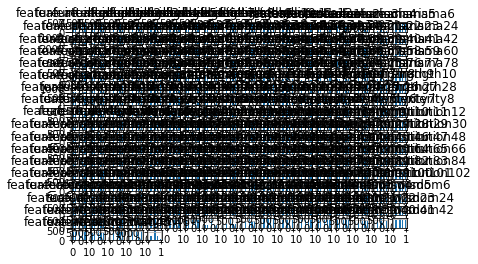

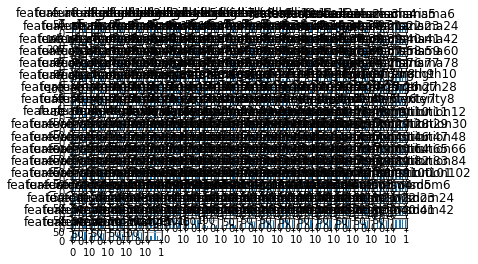

In [19]:
trainByEra.hist()